# Анализ статистических данных портфеля
В этом проекте мы будем использовать Python для проведения портфельного анализа, например, для расчета доходности портфеля, риска и коэффициента Шарпа. Портфель - это набор финансовых инвестиций, таких как акции, ценные бумаги с фиксированным доходом (облигации), наличные деньги, взаимные фонды и биржевые фонды (ETF). В этом практическом проекте мы выполним следующие задания:
* Импорт библиотек и датасета
* Произвольное распределение активов и рассчет ежедневной доходности портфеля
* Распределение портфеля - Ежедневный расчет доходности/стоимости
* Визулизация данных портфеля
* Рассчитываем статистические показатели портфеля (кумулятивную доходность, среднедневную доходность и коэффициент Шарпа)

### Импорт библиотек и датасета

In [61]:
import pandas as pd
import plotly.express as px
import numpy as np

from IPython import display


In [40]:
# Чтение файла данных акций.
stocks_df = pd.read_csv("stock_data.csv")
stocks_df.head()

,Date,FB,TWTR,NFLX
0,2013-11-07,47.560001,44.900002,46.694286
1,2013-11-08,47.529999,41.650002,47.842857
2,2013-11-11,46.200001,42.900002,48.272858
3,2013-11-12,46.610001,41.900002,47.675713
4,2013-11-13,48.709999,42.599998,47.897144


In [41]:
# Функция для построения интерактивного графика
def interactive_plot(stocks_df, title, columns):
    fig = px.line(title=title)
    for i in columns:
        fig.add_scatter(x = stocks_df["Date"], y = stocks_df[i], name = i)
    fig.show()
    
# Построение интерактивной диаграммы 
interactive_plot(stocks_df, "Цены", stocks_df.columns[1:])

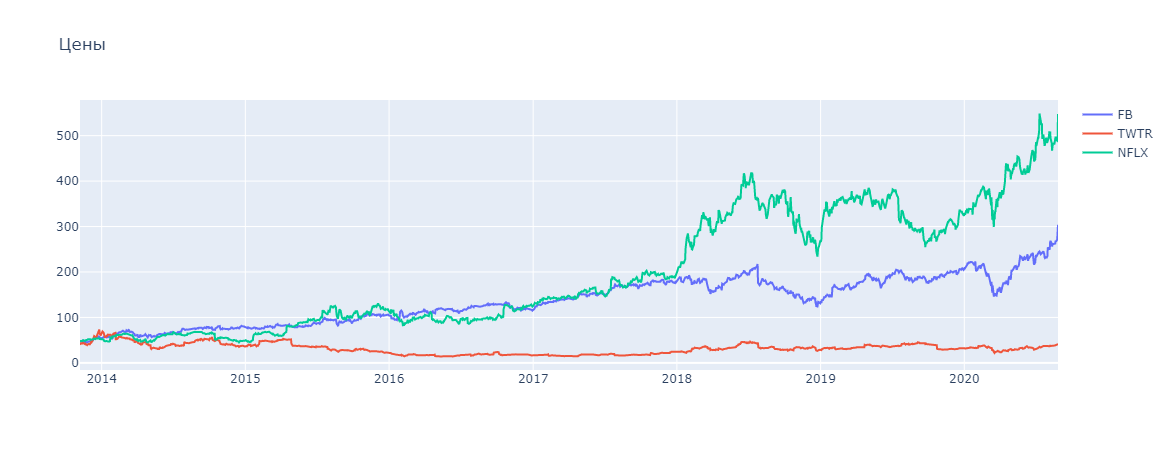

In [64]:
display.Image("img\Price.jpg")

In [42]:
# Функция для нормализации цен на основе начальной цены

def normalize(df, columns):
    x = df.copy()
    for i in columns:
        x[i] = x[i]/x[i][0]
    return x
    
# Построение нормализованной интерактивной диаграммы
interactive_plot(normalize(stocks_df, ["FB", "TWTR", "NFLX"]), "Цены (нормализованные)", stocks_df.columns[1:])

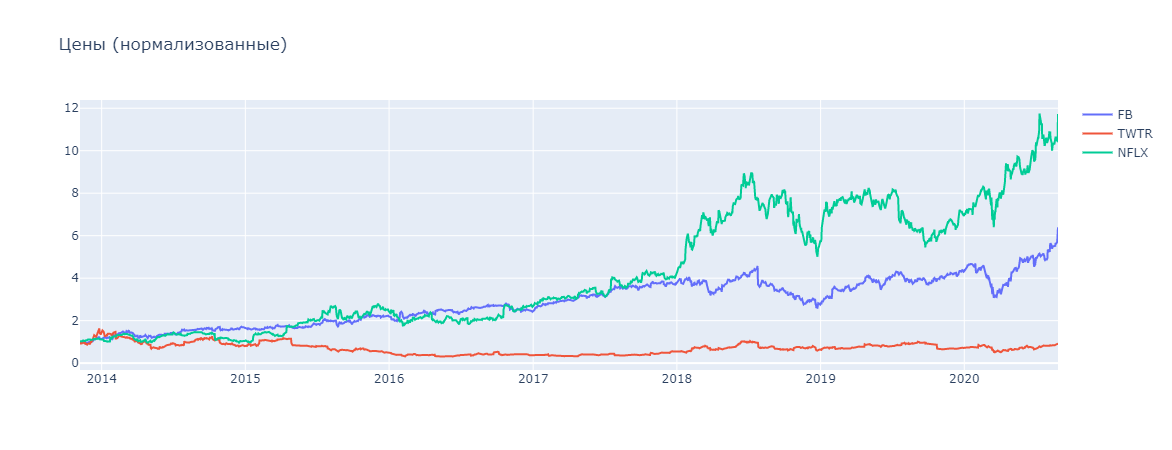

In [65]:
display.Image("img\Price_norm.jpg")

### Произвольное распределение активов и рассчет ежедневной доходности портфеля

In [43]:
# Создайте случайные веса для акций и нормализуйте их.
weights = np.random.random(3)
weights /= weights.sum()

In [44]:
# Нормализовать значения акций. 
df_portfolio = normalize(stocks_df, ["FB", "TWTR", "NFLX"])

In [45]:
# Задаем наш первоначальный вклад
deposit = 1000000

In [46]:
# Расчитываем вклад для каждой акции
for counter, stock in enumerate(df_portfolio.columns[1:]):
  df_portfolio[stock] = df_portfolio[stock] * weights[counter]
  df_portfolio[stock] = df_portfolio[stock] * deposit

In [47]:
# Создадим дополнительный столбец, который будет содержать размер портфеля
df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio != 'Date'].sum(axis = 1)

In [48]:
# Давайте рассчитаем дневную доходность портфеля 
# Определите новый столбец в датафрейме и установите в нем нули
df_portfolio['portfolio daily % return'] = 0.0000

for i in range(1, len(stocks_df)):
  # Вычислите процент изменения по сравнению с предыдущим днем
  df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100 

# Округляем значения
df_portfolio.round(decimals = 0)

,Date,FB,TWTR,NFLX,portfolio daily worth in $,portfolio daily % return
0,2013-11-07,483491.0,213725.0,302784.0,1000000.0,0.0
1,2013-11-08,483186.0,198255.0,310231.0,991673.0,-1.0
2,2013-11-11,469665.0,204205.0,313020.0,986890.0,-0.0
3,2013-11-12,473833.0,199445.0,309148.0,982426.0,-0.0
4,2013-11-13,495182.0,202777.0,310583.0,1008542.0,3.0
...,...,...,...,...,...,...
1707,2020-08-20,2734733.0,185451.0,3228575.0,6148759.0,3.0
1708,2020-08-21,2714401.0,186879.0,3192327.0,6093607.0,-1.0
1709,2020-08-24,2758928.0,192734.0,3169632.0,6121293.0,0.0
1710,2020-08-25,2854793.0,193019.0,3181109.0,6228921.0,2.0


### Распределение портфеля - Ежедневный расчет доходности/стоимости

In [49]:
# Мы создадим функцию, которая принимает цены на акций вместе с весами и выдает:
# (1) Ежедневная стоимость каждой отдельной ценной бумаги в $ за указанный период времени.
# (2) Общая дневная стоимость всего портфеля 
# (3) Ежедневная доходность 

def portfolio_allocation(df, weights):

  df_portfolio = df.copy()
  
  # нормализация значений акций 
  df_portfolio = normalize(df_portfolio, ["FB", "TWTR", "NFLX"])
  
  for counter, stock in enumerate(df_portfolio.columns[1:]):
    df_portfolio[stock] = df_portfolio[stock] * weights[counter]
    df_portfolio[stock] = df_portfolio[stock] * deposit

  df_portfolio['portfolio daily worth in $'] = df_portfolio[df_portfolio != 'Date'].sum(axis = 1)
  
  df_portfolio['portfolio daily % return'] = 0.0000

  for i in range(1, len(stocks_df)):
    
    # Вычисляем процент изменения по сравнению с предыдущим днем
    df_portfolio['portfolio daily % return'][i] = ( (df_portfolio['portfolio daily worth in $'][i] - df_portfolio['portfolio daily worth in $'][i-1]) / df_portfolio['portfolio daily worth in $'][i-1]) * 100 
  
  # Устанавливаем значение первой строки в ноль, так как предыдущее значение недоступно
  df_portfolio['portfolio daily % return'][0] = 0
  return df_portfolio

In [50]:
# Вызываем функцию
df_portfolio = portfolio_allocation(stocks_df, weights)

### Визулизация данных портфеля

In [51]:
# Построение графика дневной доходности портфеля
interactive_plot(df_portfolio, "Ежедневный доход", ["portfolio daily % return"])

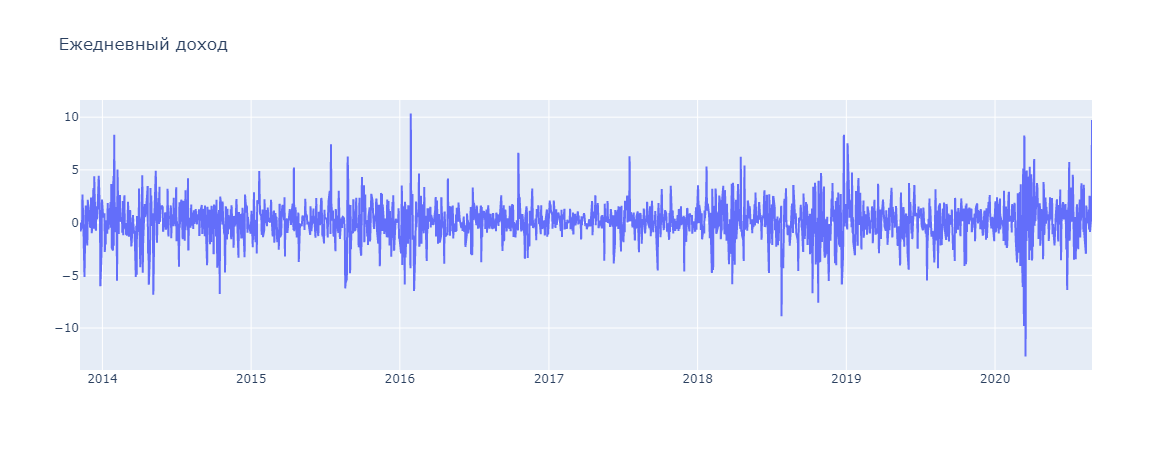

In [67]:
display.Image("img\Daily_return.jpg")

In [52]:
# Построение графика всех акций (нормализованных)
normalized = normalize(df_portfolio, ["FB", "TWTR", "NFLX", "portfolio daily worth in $"])
interactive_plot(normalized,"Акции (нормализованные)", ["FB", "TWTR", "NFLX"])

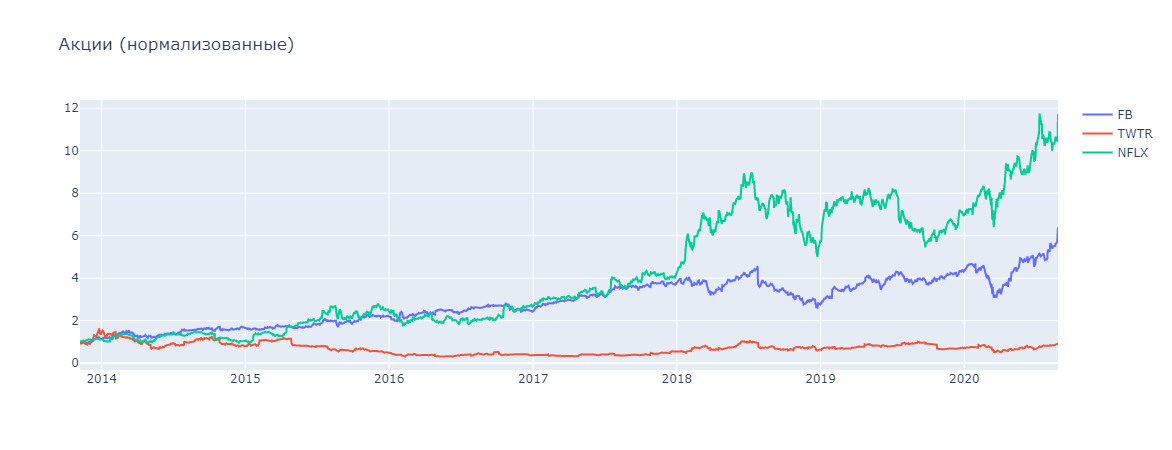

In [68]:
display.Image("img\Stocks_norm.jpg")

In [53]:
# Вывод гистограммы дневной доходности
def interactive_histogram (df, title, column):
    hist = px.histogram(df, x = column, title=title)
    hist.show()
interactive_histogram(df_portfolio, "Гистограмма дневной доходности", "portfolio daily % return")

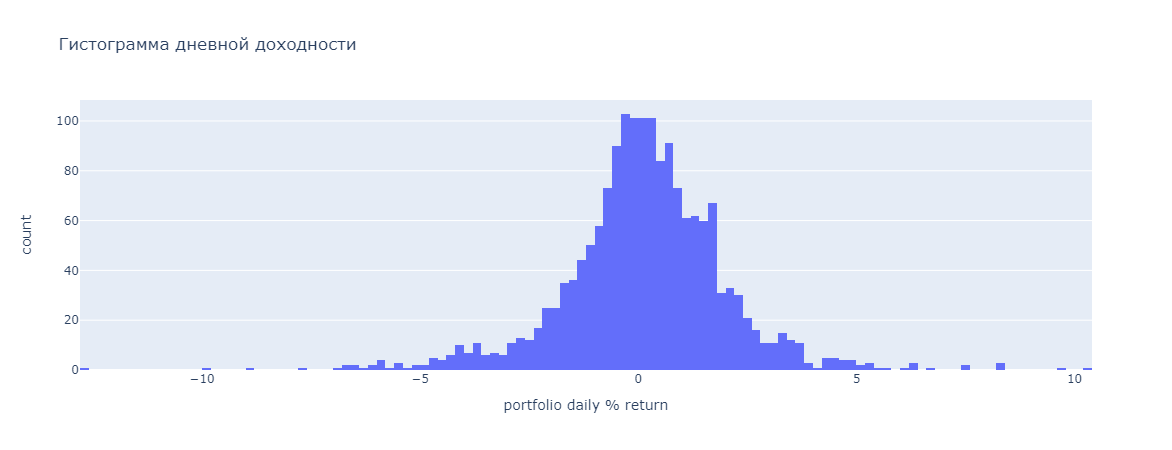

In [69]:
display.Image("img\Daily_return_hist.jpg")

### Рассчитываем статистические показатели портфеля (кумулятивную доходность, среднедневную доходность и коэффициент Шарпа)

In [54]:
# Кумулятивная доходность портфеля (Обратите внимание, что теперь мы ищем последнюю чистую стоимость портфеля по сравнению с его начальной стоимостью)
cummulative_return = ((df_portfolio['portfolio daily worth in $'][-1:] - df_portfolio['portfolio daily worth in $'][0])/ df_portfolio['portfolio daily worth in $'][0]) * 100
print('Кумулятивная доходность портфеля составляет: {} %'.format(cummulative_return.values[0]))

Кумулятивная доходность портфеля составляет: 583.5460602702412 %


In [55]:
# Рассчитываем стандартное отклонение портфеля
std = df_portfolio["portfolio daily % return"].std()
print('Cтандартное отклонение портфеля составляет: {} %'.format(std))

Cтандартное отклонение портфеля составляет: 1.9254326878859458 %


In [56]:
# Рассчитываем среднюю дневную доходность 
mean = df_portfolio["portfolio daily % return"].mean()
print('Средняя дневная доходность портфеля: {} %'.format(mean))

Средняя дневная доходность портфеля: 0.13092133458813898 %


In [57]:
# Коэффициент доходности портфеля
sharpe_ratio = df_portfolio['portfolio daily % return'].mean() / df_portfolio['portfolio daily % return'].std() * np.sqrt(252)
print('Коэффициент Шарпа портфеля составляет: {}'.format(sharpe_ratio))

Коэффициент Шарпа портфеля составляет: 1.0793998506794218
